In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv("covid.csv")

In [4]:
df.head()

,pc,wbc,mc,ast,bc,ldh,diagnosis
0,Low,Low,Low,High,Normal,Normal,True
1,Low,Low,Normal,High,Normal,High,True
2,Low,High,Normal,High,Normal,Normal,False
3,Low,High,Normal,High,High,Normal,True
4,Low,Normal,High,High,Normal,Normal,False


In [5]:
from sklearn import preprocessing

In [6]:
df.describe()

,pc,wbc,mc,ast,bc,ldh,diagnosis
count,25,25,25,25,25,25,25
unique,3,3,3,2,2,2,2
top,Low,Normal,Normal,High,Normal,Normal,True
freq,9,10,13,18,18,14,16


In [7]:
le = preprocessing.LabelEncoder()
encoded_pc = le.fit_transform(df['pc'].values)

In [8]:
encoded_pc

array([1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 2, 0, 2, 2, 2, 1,
       1, 0, 0])

In [9]:
encoded_wbc = le.fit_transform(df['wbc'].values)
encoded_mc = le.fit_transform(df['mc'].values)
encoded_ast = le.fit_transform(df['ast'].values)
encoded_bc = le.fit_transform(df['bc'].values)
encoded_ldh = le.fit_transform(df['ldh'].values)
Y = le.fit_transform(df['diagnosis'].values)

In [10]:
print(Y)

[1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0]


In [11]:
X = np.array(list(zip(encoded_pc, encoded_wbc, encoded_mc, encoded_ast, encoded_bc, encoded_ldh)))


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=100)

**What is random_state in Train_test_split?**

random_state is basically used for **reproducing your problem the same every time it is run**. If you do not use a random_state in train_test_split, every time you make the split you might get a different set of train and test data points and will not help you in debugging in case you get an issue.

In [14]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()


In [15]:
model.fit(X_train, Y_train)

MultinomialNB()

In [16]:
Y_pred = model.predict(X_test)

In [17]:
print(Y_pred)
print(Y_test)

[0 1 0 0 1 1 1]
[0 1 1 1 1 1 1]


In [18]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(Y_test,Y_pred)

0.7142857142857143

In [19]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.67      0.80         6

    accuracy                           0.71         7
   macro avg       0.67      0.83      0.65         7
weighted avg       0.90      0.71      0.76         7



In [20]:
y_prob = model.predict_proba(X_test)

In [21]:
y_prob

array([[0.73439775, 0.26560225],
       [0.37352829, 0.62647171],
       [0.69128344, 0.30871656],
       [0.61336744, 0.38663256],
       [0.33576079, 0.66423921],
       [0.12619363, 0.87380637],
       [0.35448496, 0.64551504]])

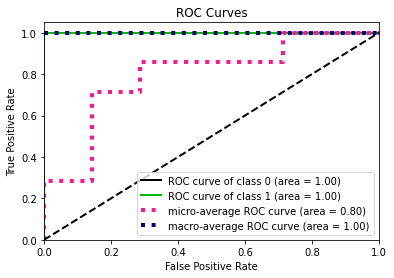

In [22]:
import scikitplot as skplot
skplot.metrics.plot_roc(Y_test, y_prob)